# Exploratory Data Analysis for Credit Card Client Segmentation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
# Incluye el link al archivo CSV donde has almacenado tu dataset
df = pd.read_csv(r"..\data\raw\dataset.csv")

# TAREA #6: APLICAR EL MÉTODO DE K-MEANS

In [ ]:
kmeans = KMeans(8)
kmeans.fit(creditcard_df_scaled)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_.shape

(8, 17)

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns=[df.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.135630,0.400131,0.539387,0.669386,0.045410,-0.331722,0.977756,1.902452,0.168801,-0.414087,-0.330446,0.616253,0.429303,0.143434,-0.158654,0.445917,0.268936
1,0.011995,0.404100,-0.357021,-0.241749,-0.399925,-0.094577,-0.852753,-0.394841,-0.754326,0.102807,-0.028741,-0.481657,-0.303464,-0.250302,-0.011802,-0.455361,0.273520
2,-0.361430,0.332243,-0.034806,-0.242518,0.363059,-0.363193,0.993781,-0.384169,1.206526,-0.473349,-0.360135,0.189821,-0.261013,-0.214810,-0.030171,0.313605,0.256155
3,1.684378,0.392729,-0.217494,-0.155556,-0.228546,2.007810,-0.471593,-0.208498,-0.411691,1.912655,1.919139,-0.265987,1.027732,0.820395,0.551555,-0.390256,0.070846
4,1.042239,0.465006,2.500780,1.806350,2.594499,-0.161300,1.164798,1.562962,1.273275,-0.284847,-0.150801,3.128411,1.303209,1.436890,0.559682,0.251719,0.337526
5,1.845310,0.340595,12.297201,12.823670,5.516158,0.272530,1.043177,2.145028,0.896761,-0.380373,-0.109730,4.556136,3.185151,9.047799,1.030898,1.222264,0.298409
6,-0.336893,-0.351916,-0.288199,-0.214424,-0.287144,0.067274,-0.203348,-0.286554,-0.225256,0.306510,-0.000298,-0.387867,-0.563134,-0.393094,-0.208930,0.013378,-3.201889
7,-0.701208,-2.141009,-0.310385,-0.234926,-0.302187,-0.322400,-0.554752,-0.442477,-0.439746,-0.521503,-0.376311,-0.419356,-0.175381,-0.201786,-0.256971,0.282604,0.201234


In [ ]:
# Para entender mejor estos valores, vamos a aplicar la transformación inversa.
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns=[df.columns])
cluster_centers

# Primer Cluster de Clientes (Transactors): Esos son los clientes que pagan la menor cantidad de cargos por intereses y tienen cuidado con su dinero, Clúster con el saldo más bajo ($ 104) y anticipo en efectivo ($ 303), Porcentaje de pago completo = 23%
# Segundo Cluster de Clientes (Revolvers) que usan tarjeta de crédito como préstamo (sector más lucrativo): saldo más alto ($ 5000) y anticipo en efectivo (~ $ 5000), baja frecuencia de compra, alta frecuencia de anticipo en efectivo (0.5), transacciones de anticipo en efectivo alto (16) y bajo porcentaje de pago (3%)
# Tercer Cluster de Clientes (VIP/Prime): límite de crédito alto $ 16K y porcentaje más alto de pago completo, objetivo para aumentar el límite de crédito y aumentar los hábitos de gasto
# Cuarto Cluster de Clientes (low tenure): estos son clientes con baja antigüedad (7 años), saldo bajo


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1282.172458,0.972058,2155.612989,1703.481335,452.131655,283.234302,0.882771,0.769996,0.431523,0.052281,0.993772,30.027580,6056.429958,2148.372546,494.470259,0.284138,11.877224
1,1589.442414,0.972998,240.424411,191.184026,49.420211,780.538716,0.148099,0.084669,0.064649,0.155717,3.052689,2.737645,3390.322190,1008.544109,836.702288,0.020529,11.883358
2,812.188081,0.955976,928.841434,189.906974,739.377555,217.237799,0.889203,0.087853,0.843942,0.040422,0.791171,19.428075,3544.776886,1111.289062,793.893442,0.245439,11.860119
3,5070.366014,0.970305,538.526613,334.246201,204.396739,5189.341636,0.301078,0.140259,0.200821,0.517886,16.345538,8.098398,8233.758061,4108.105687,2149.581367,0.039571,11.612128
4,3733.806745,0.987426,6346.159662,3590.608789,2757.241014,640.617891,0.957840,0.668720,0.870470,0.078143,2.219718,92.470423,9236.056338,5892.801050,2168.520942,0.227338,11.969014
5,5405.330935,0.957955,27276.363750,21877.102917,5399.260833,1550.378389,0.909028,0.842361,0.720833,0.059028,2.500000,127.958333,16083.333333,27925.634496,3266.671038,0.511206,11.916667
6,863.259693,0.793905,387.463654,236.537740,151.406683,1119.947453,0.408737,0.116973,0.274915,0.196480,3.246795,5.068910,2445.535977,595.176112,377.303465,0.157627,7.232372
7,104.968575,0.370085,340.061778,202.509086,137.804005,302.783168,0.267702,0.070458,0.189671,0.030786,0.680779,4.286198,3856.341613,1148.993000,265.345972,0.236372,11.786622


In [ ]:
labels.shape

(8950,)

In [ ]:
labels.min()

0

In [ ]:
labels.max()

7

In [ ]:
y_kmeans = kmeans.fit_predict(creditcard_df_scaled)
y_kmeans

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([7, 1, 6, ..., 0, 0, 0], dtype=int32)

In [ ]:
# Concatenamos las etiquetas de los clusters con el dataset riginal
creditcard_df_cluster = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
creditcard_df_cluster.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1


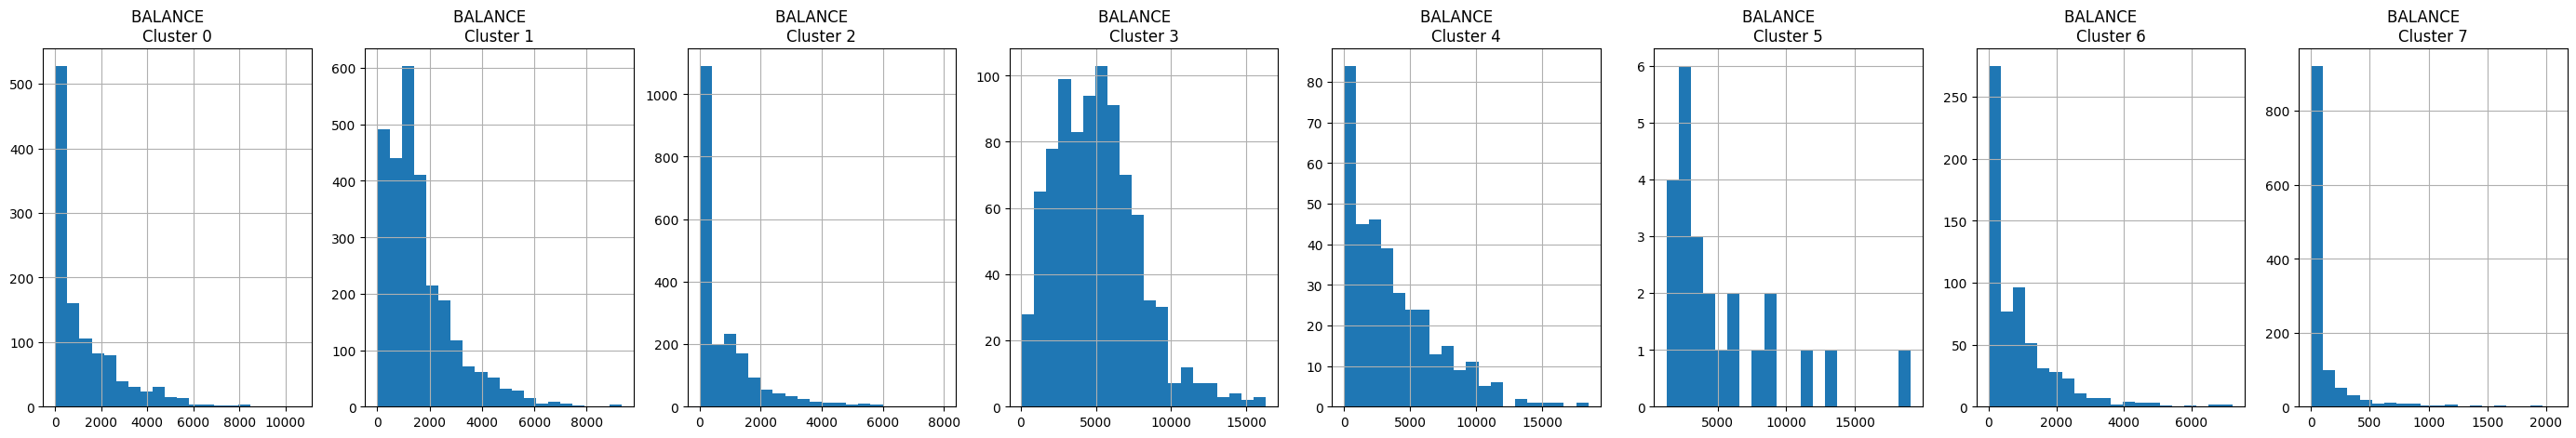

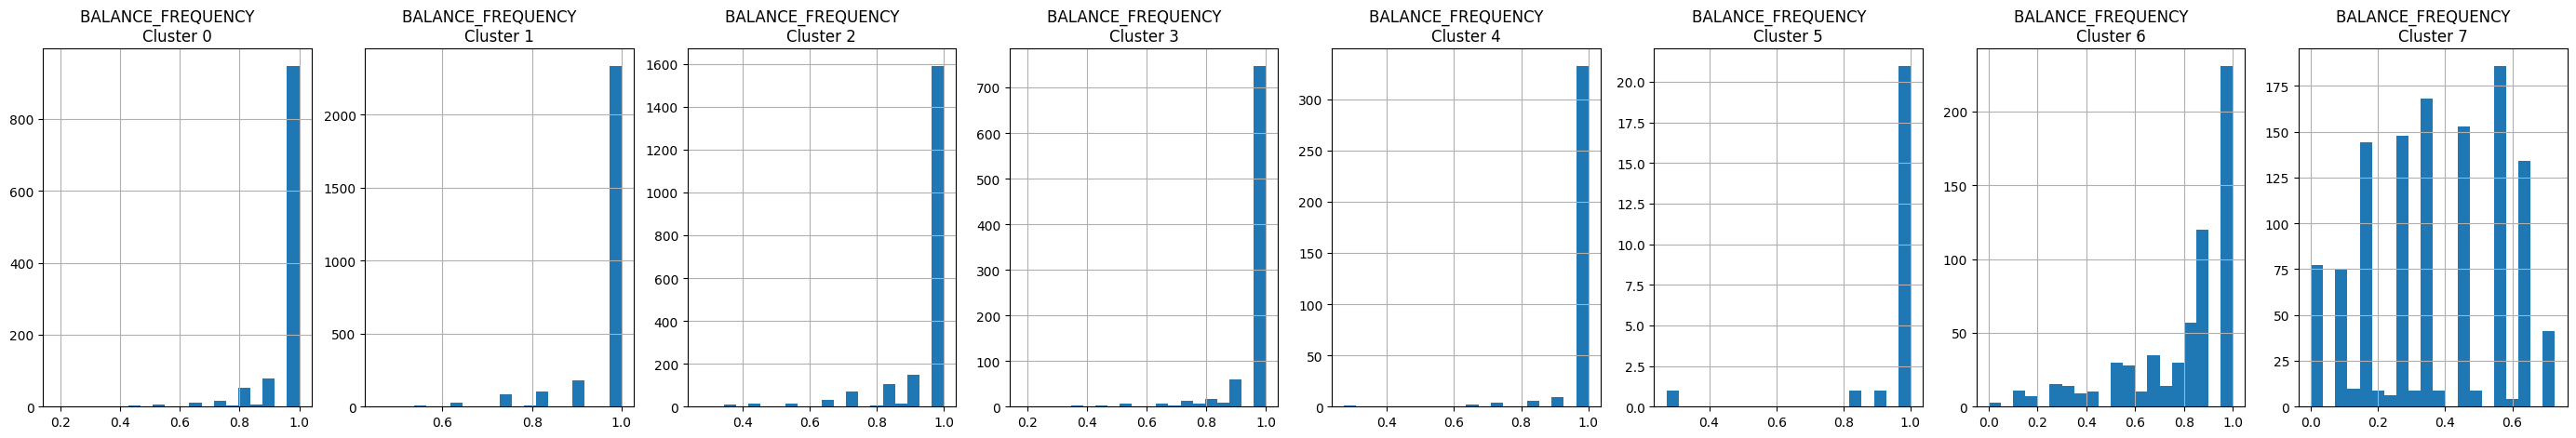

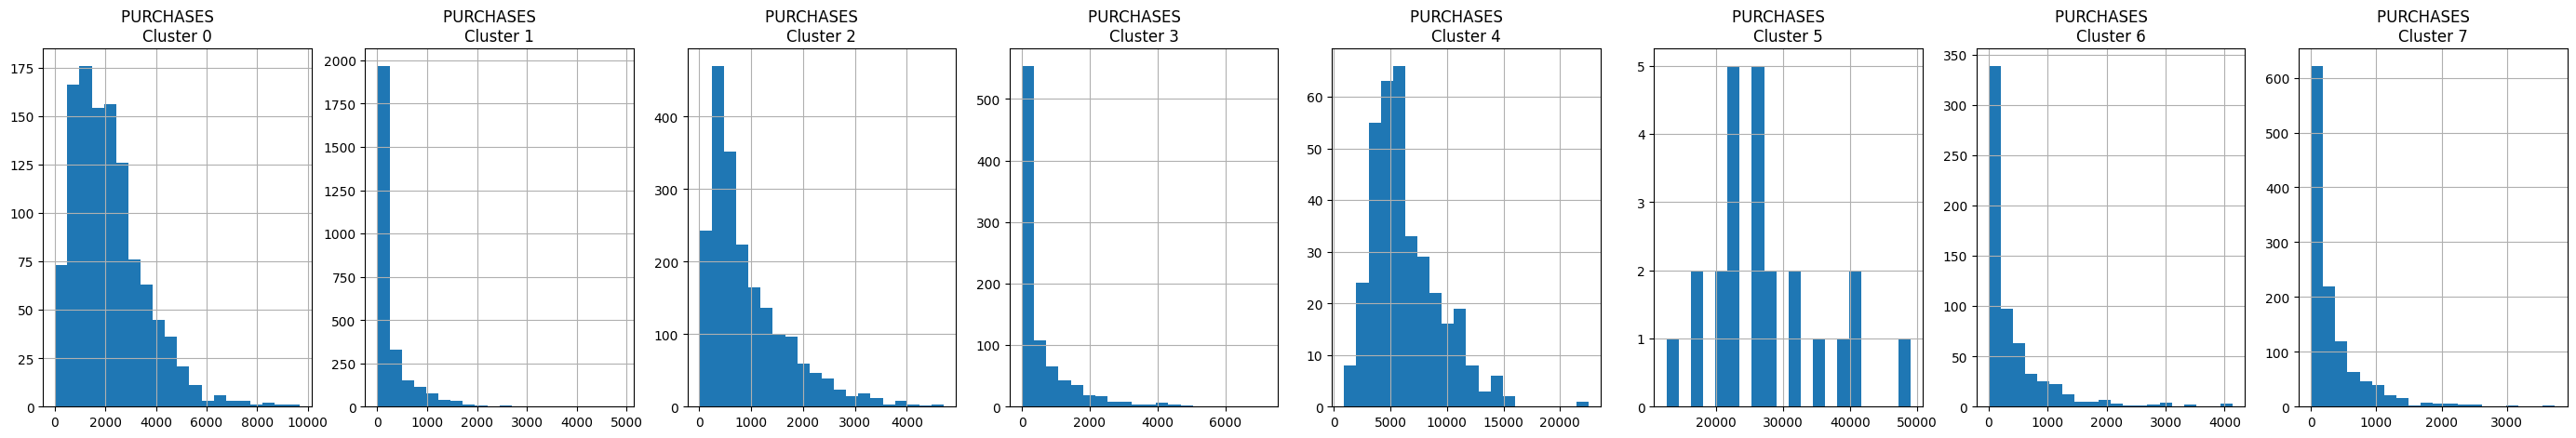

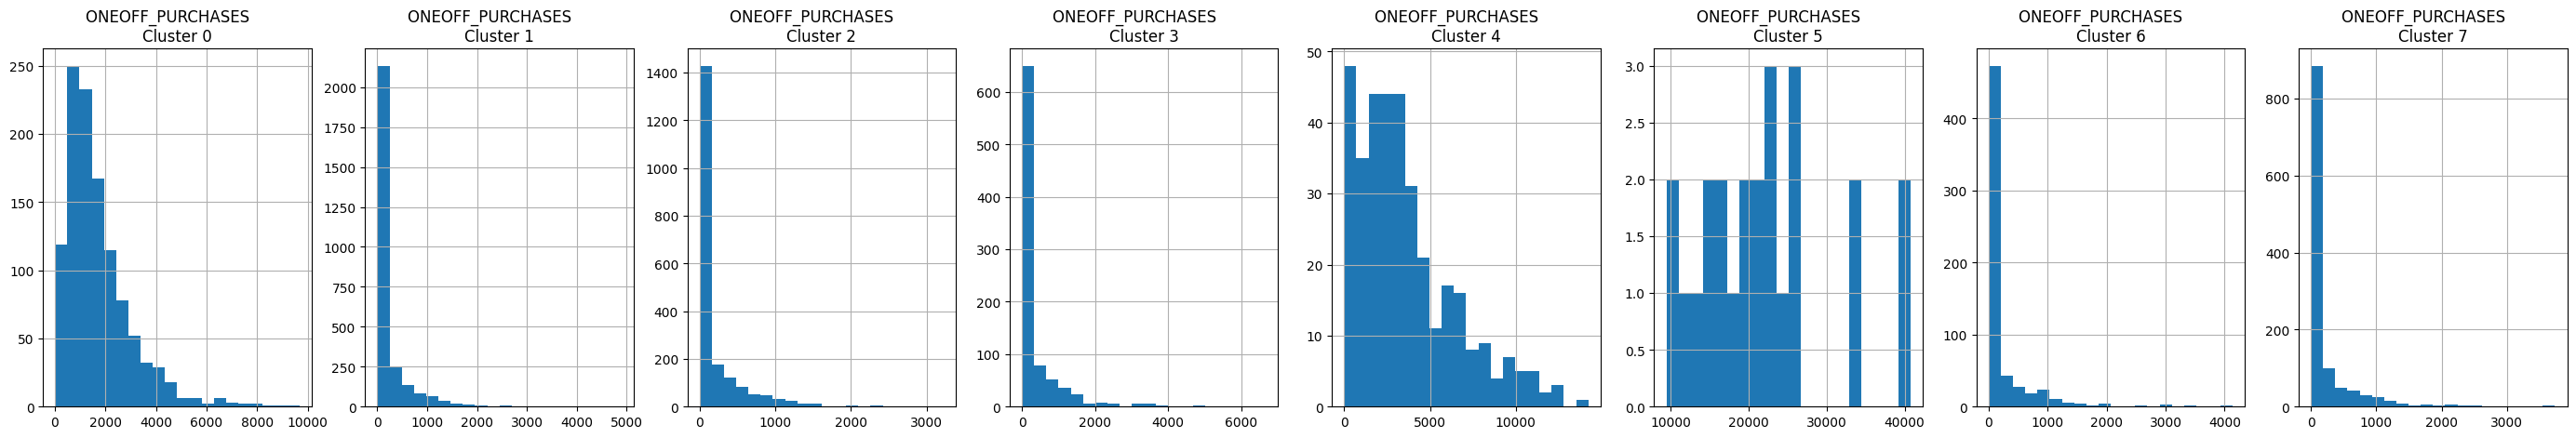

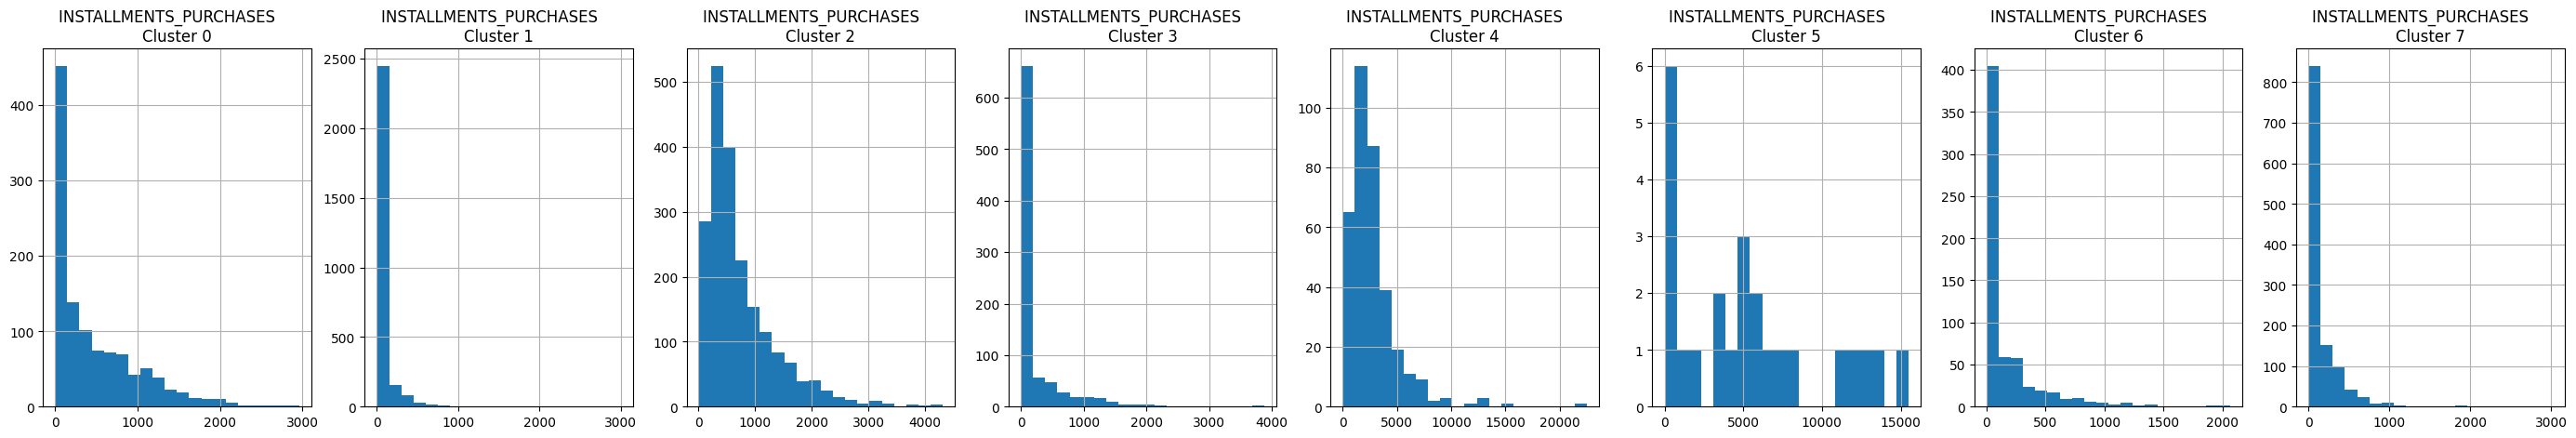

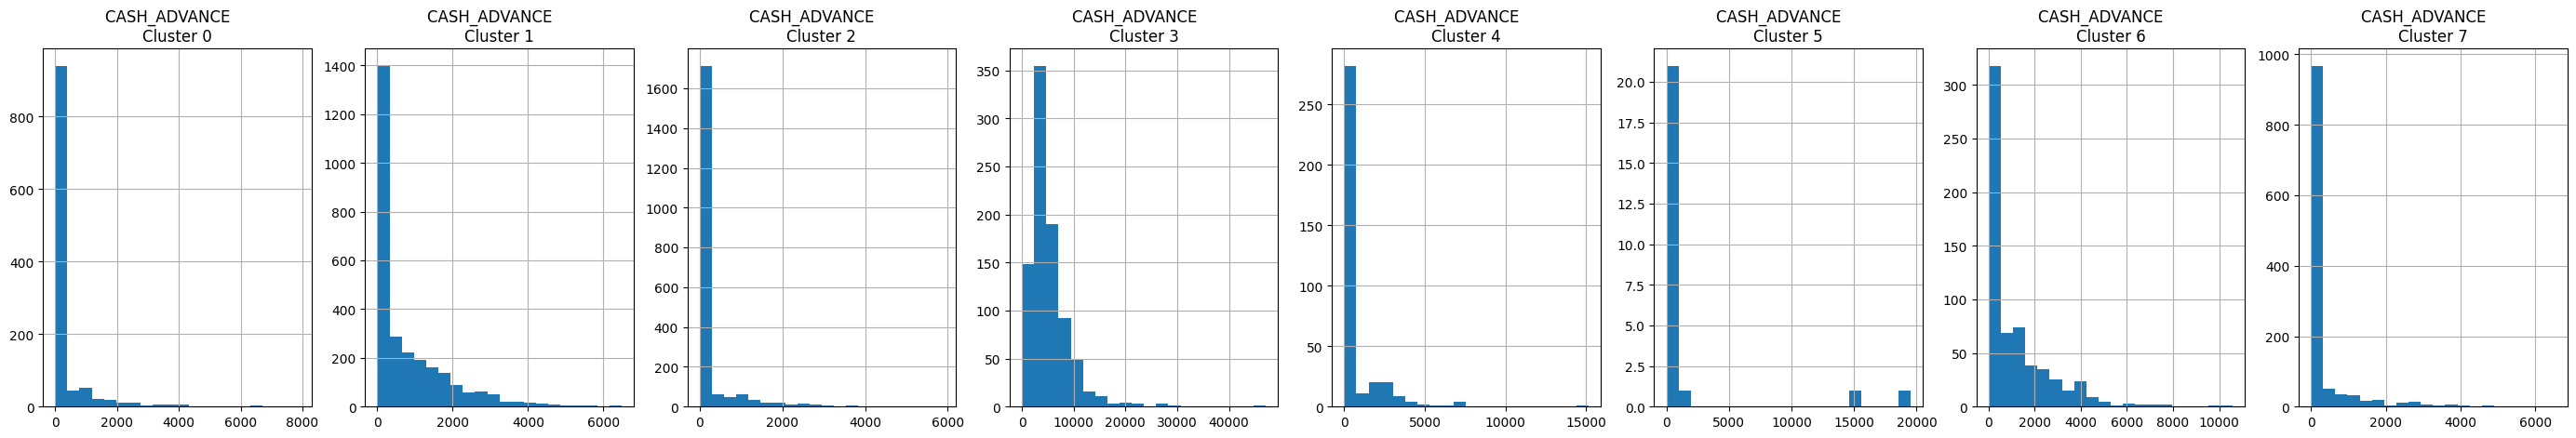

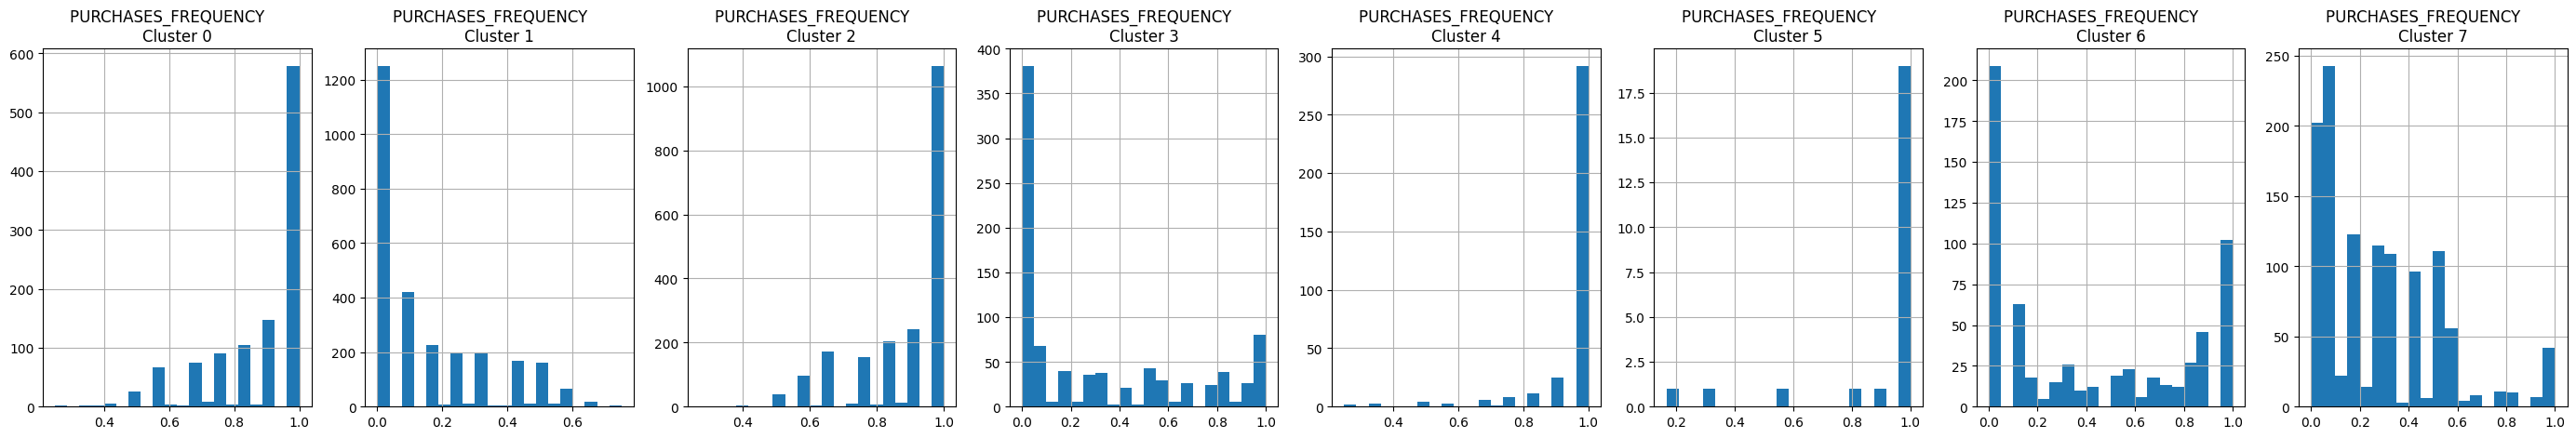

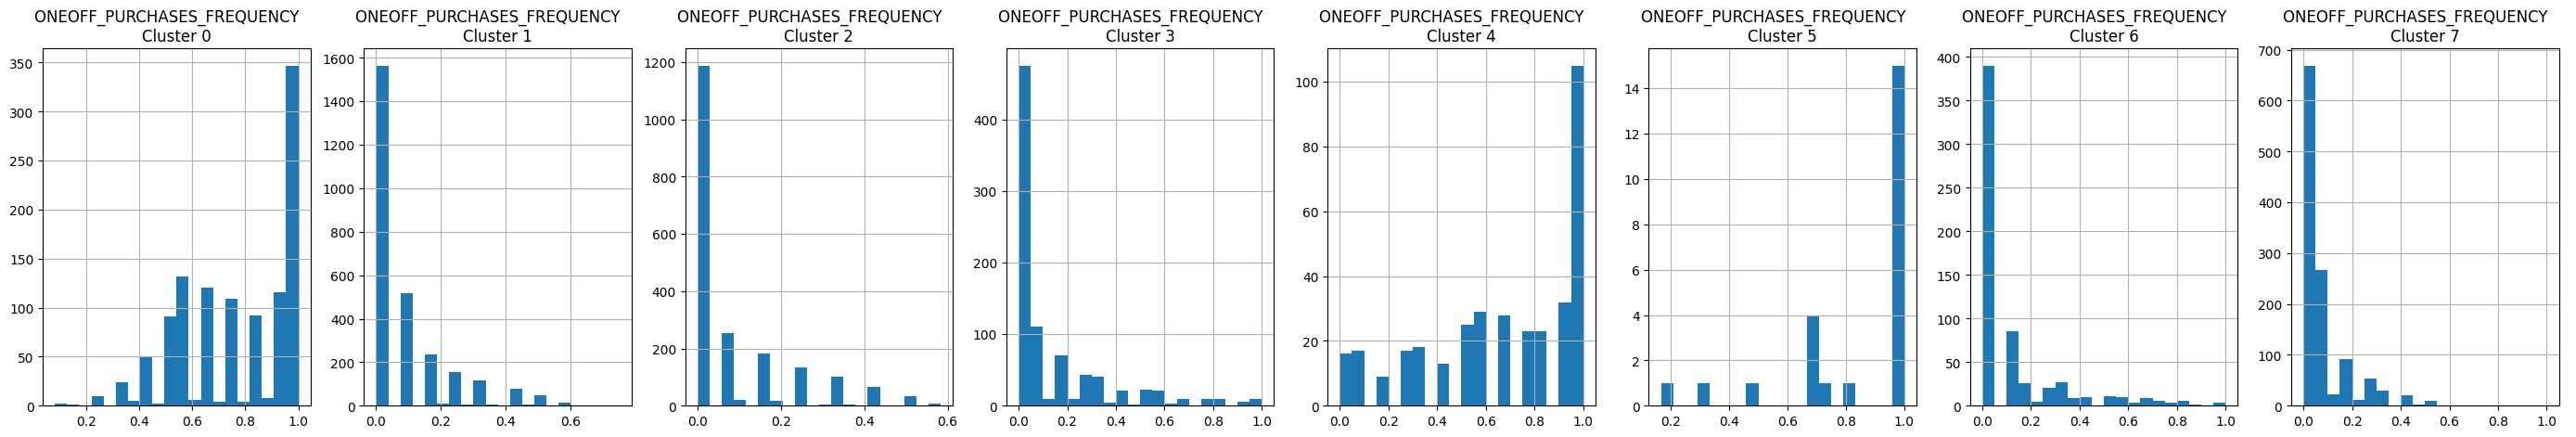

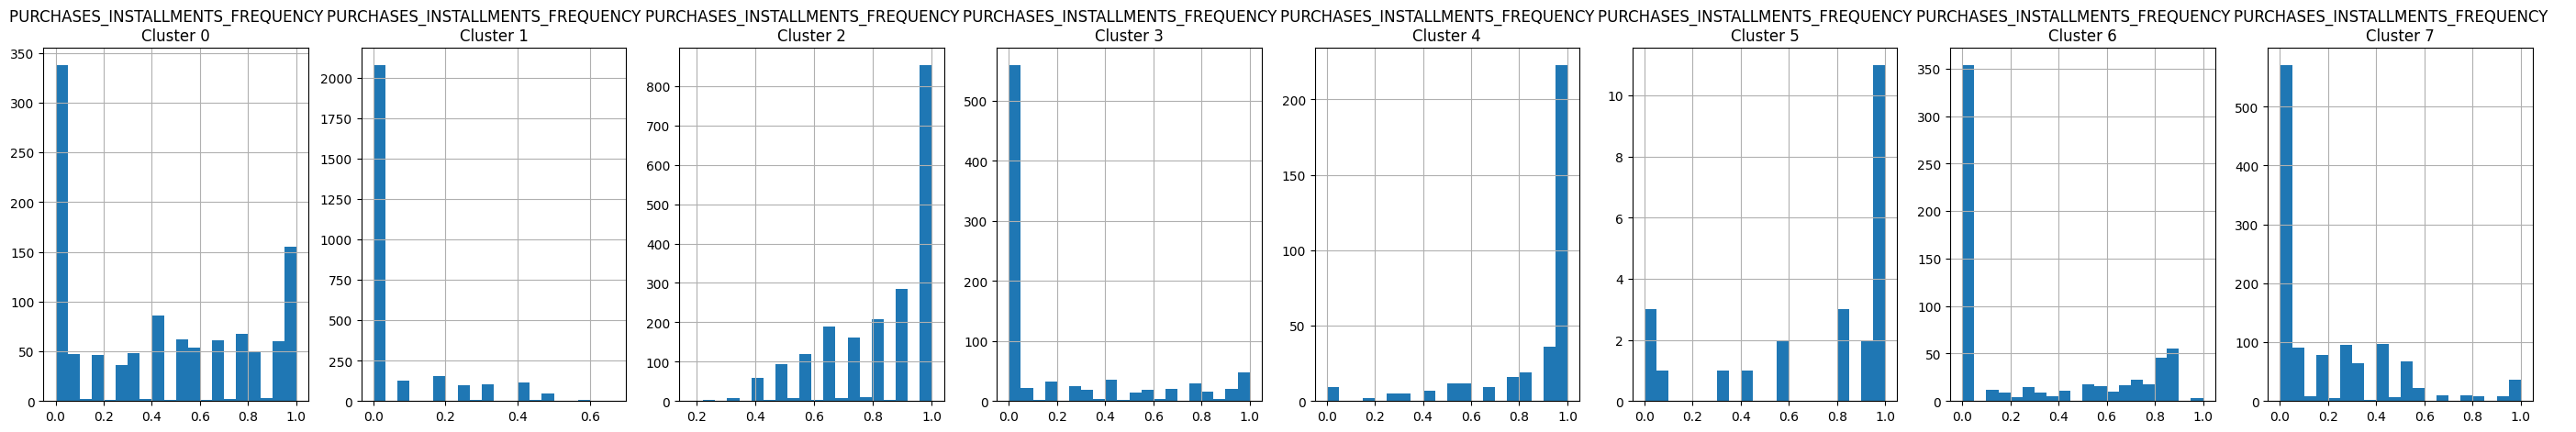

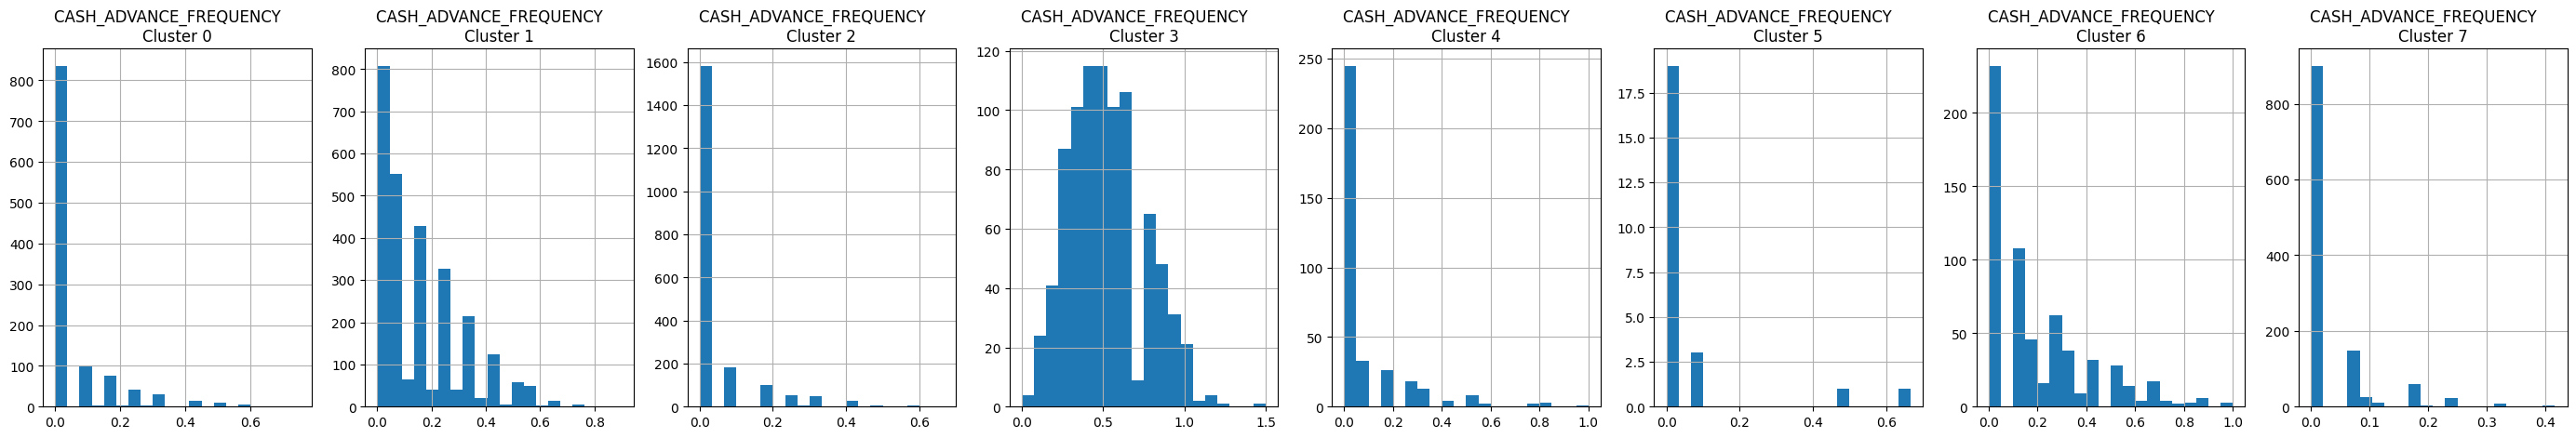

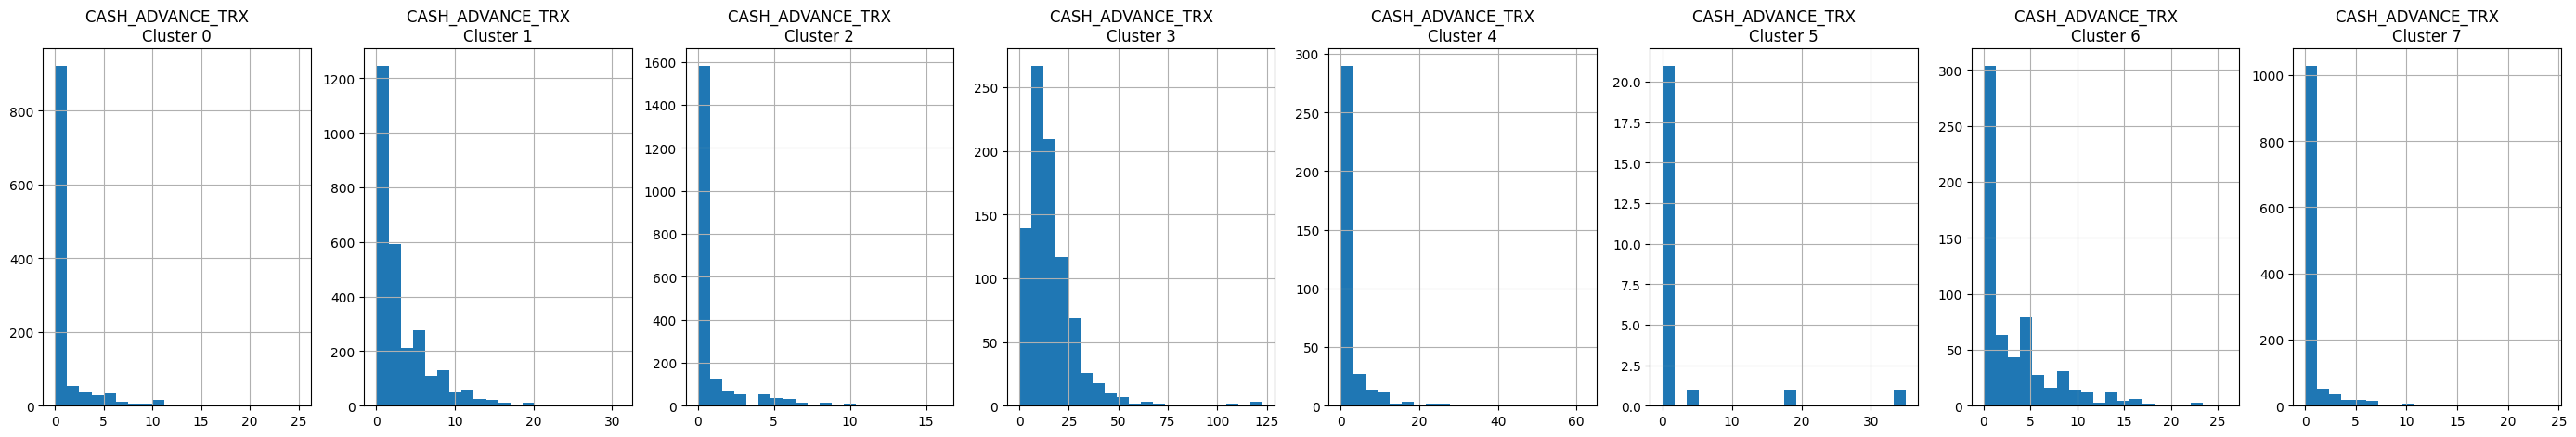

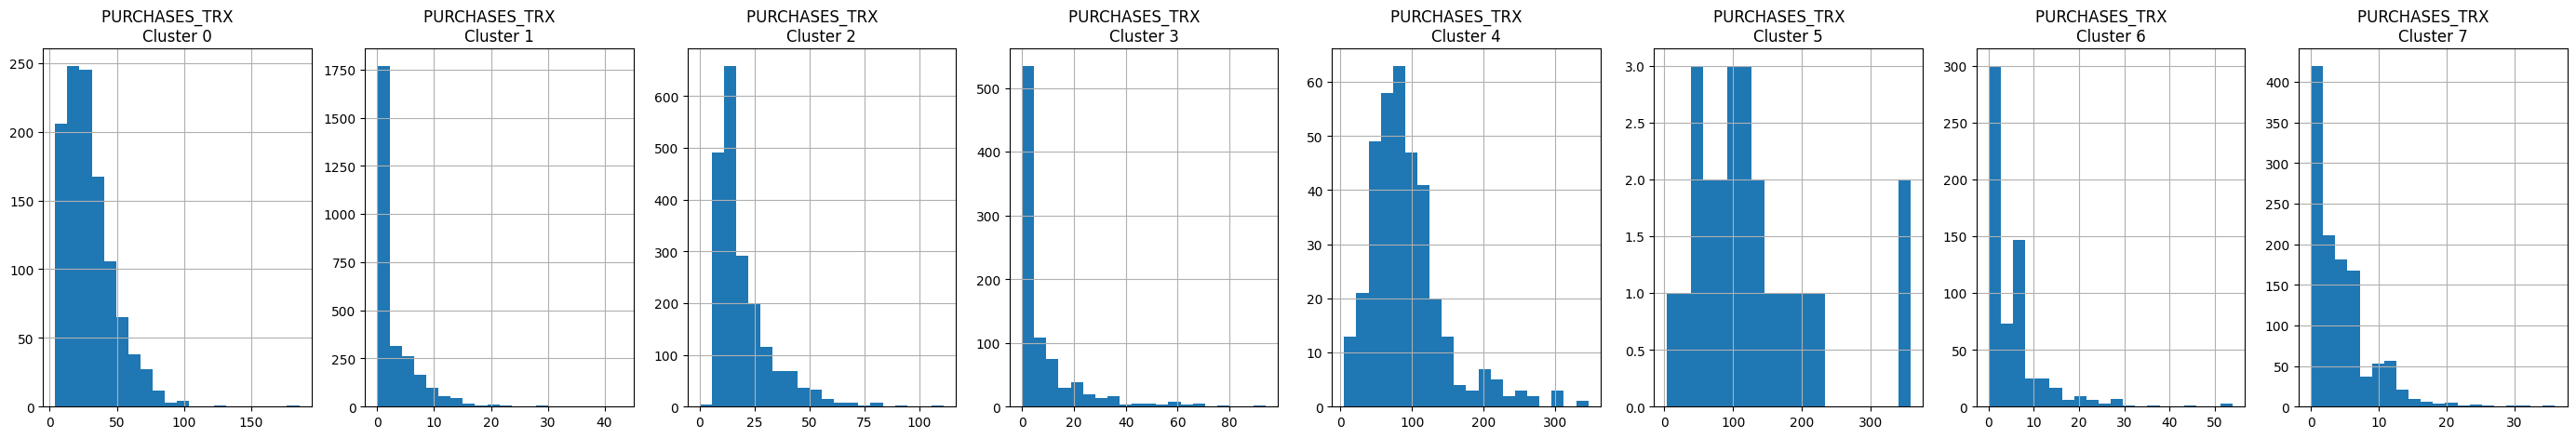

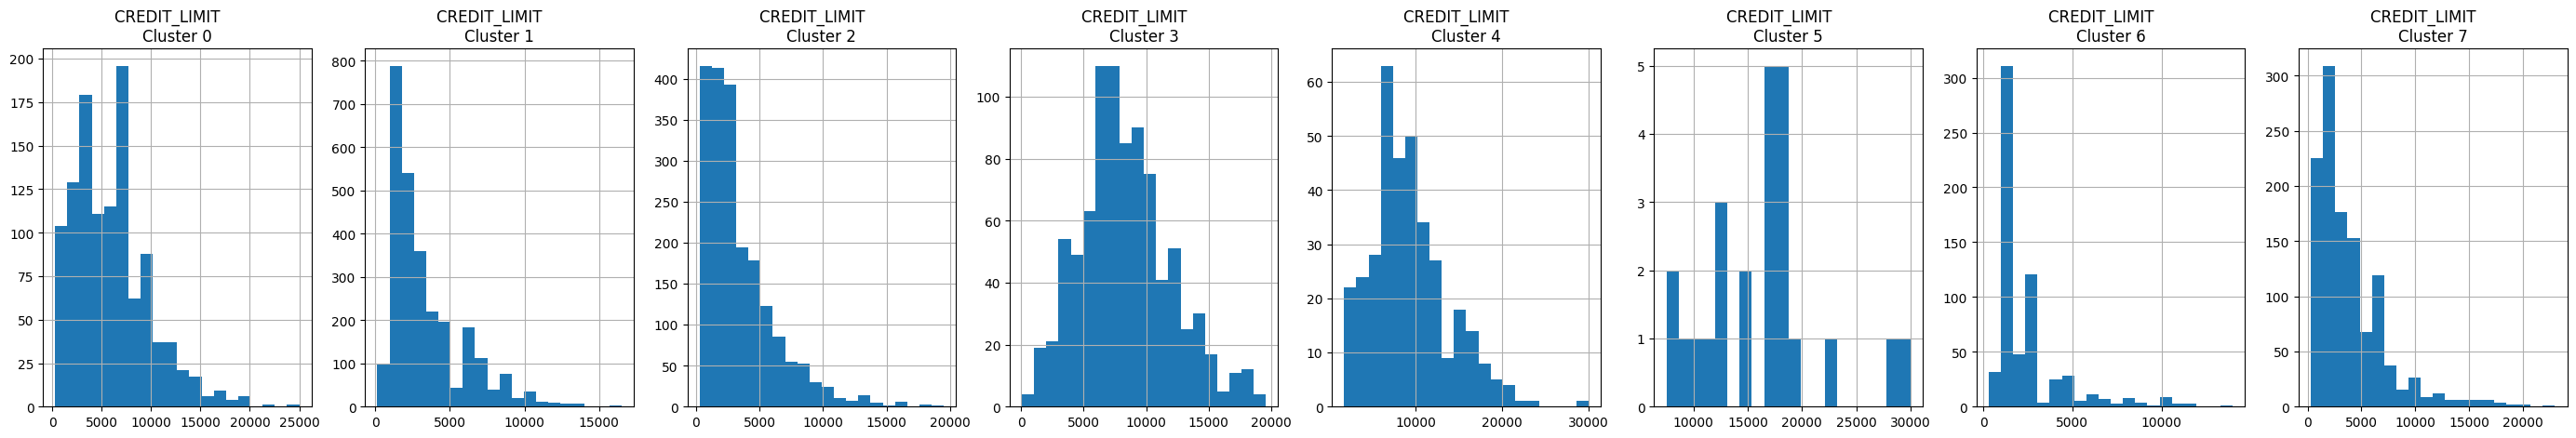

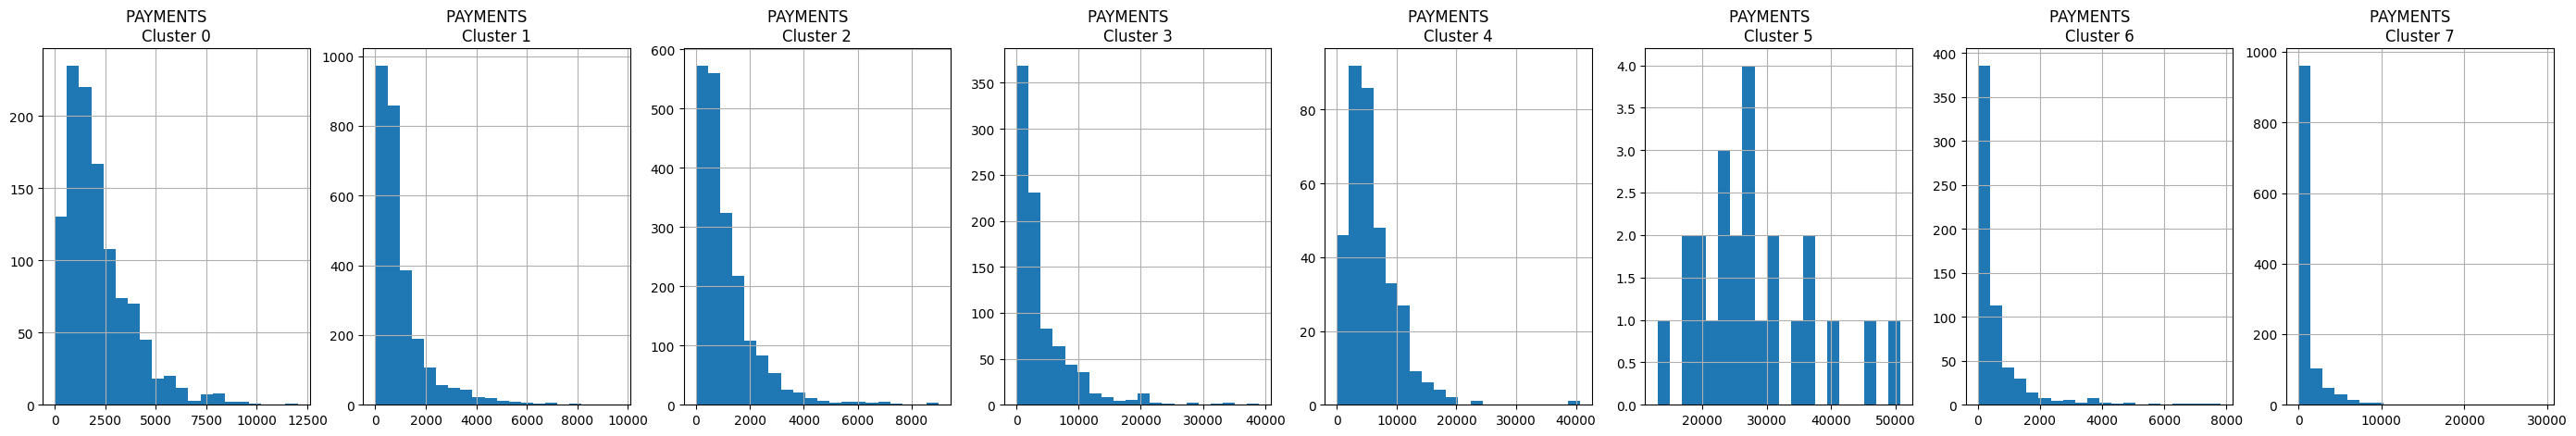

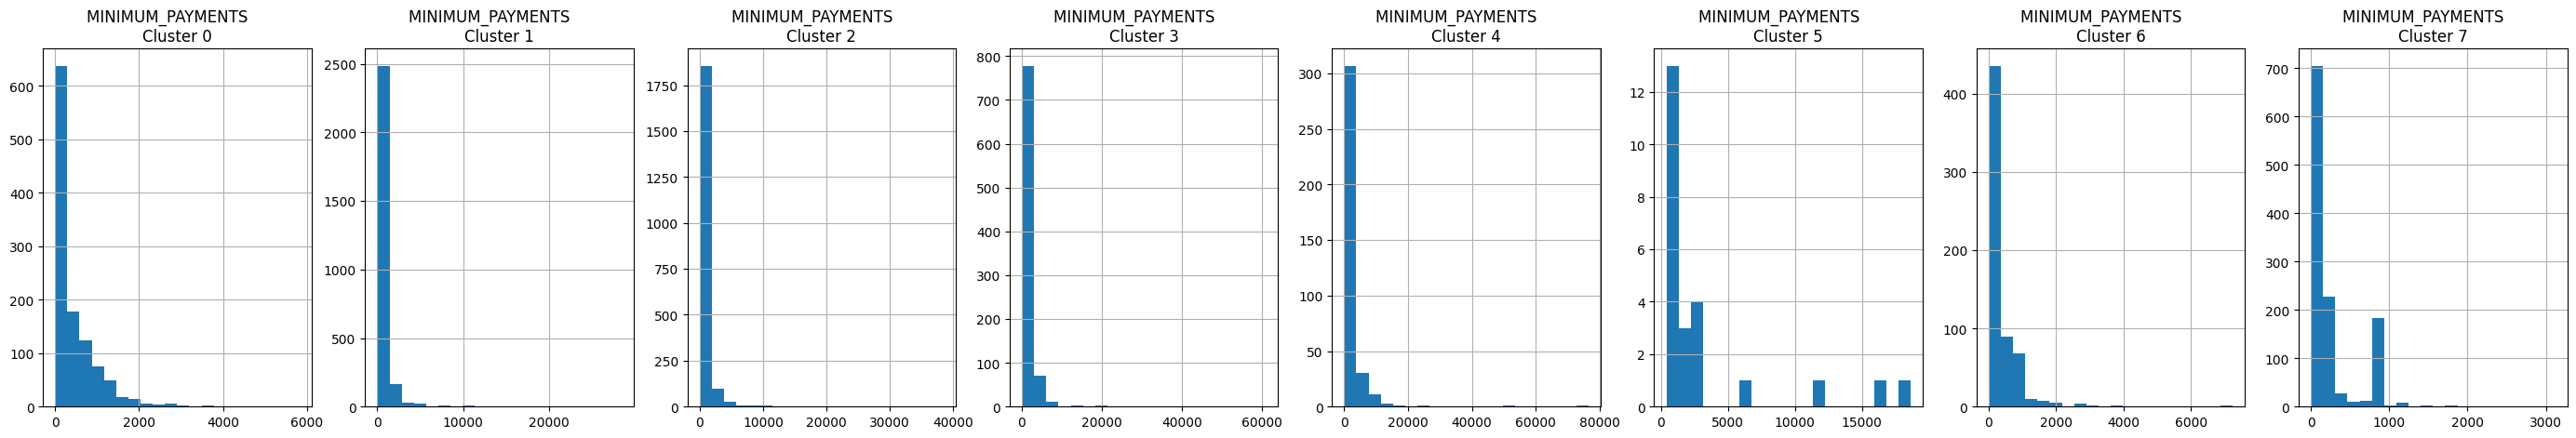

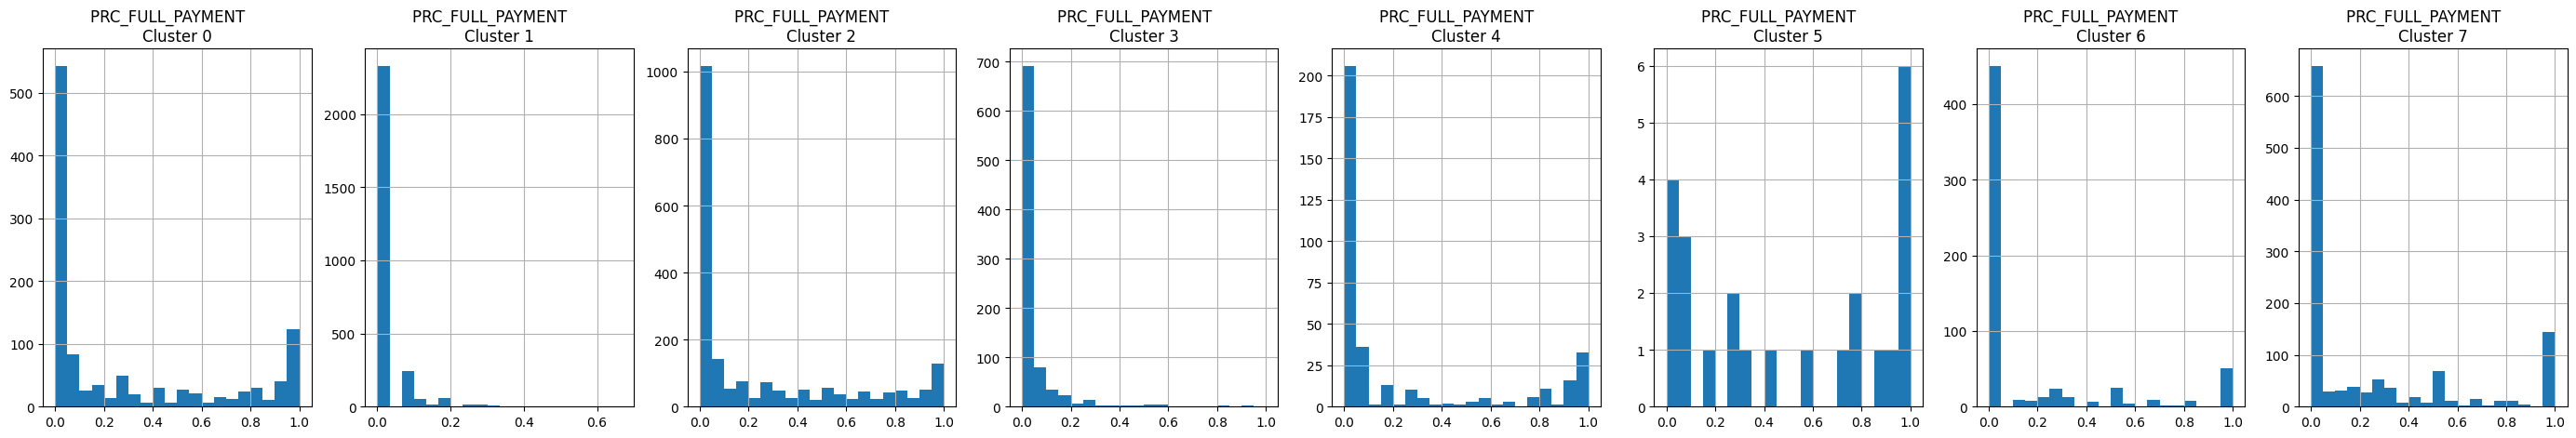

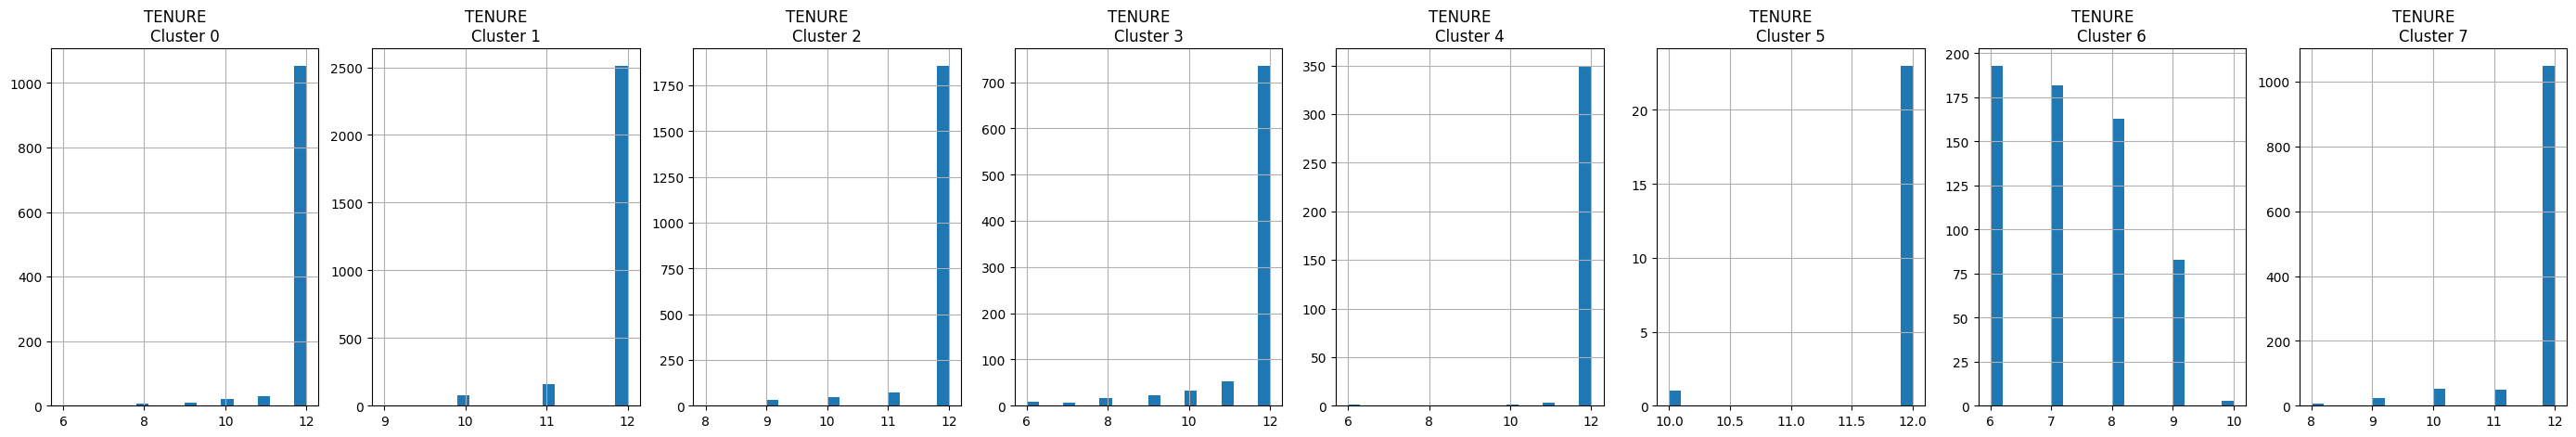

In [ ]:
# Visualizamos histogramas para cada cluster
for i in df.columns:
    plt.figure(figsize=(35, 5))
    for j in range(8):
        plt.subplot(1, 8, j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {}'.format(i, j))
    plt.show()


# TAREA 7: APLICAR ANÁLISIS DE LAS COMPONENTES PRINCIPALES Y VISUALIZAR LOS RESULTADOS

![alt text](https://drive.google.com/uc?id=17b_4GsvzJmWt9cnPOcgSGmEelagGSbtL)

In [ ]:
# Obtenemos las componentes principales
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(creditcard_df_scaled)
principal_comp


array([[-1.68221999, -1.07645189],
       [-1.13829562,  2.50646484],
       [ 0.96968184, -0.38351944],
       ...,
       [-0.9262032 , -1.81078284],
       [-2.33654944, -0.65796001],
       [-0.55642156, -0.40046214]])

In [ ]:
# Creamos un dataframe con las dos componentes
pca_df = pd.DataFrame(data = principal_comp, columns=["pca1", "pca2"])
pca_df.head()



,pca1,pca2
0,-1.682220,-1.076452
1,-1.138296,2.506465
2,0.969682,-0.383519
3,-0.873627,0.043163
4,-1.599434,-0.688581


In [ ]:
# Concatenamos las etiquetas de los clusters con el dataframe de las componentes principales

pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis = 1)

pca_df.head()


,pca1,pca2,cluster
0,-1.682220,-1.076452,1
1,-1.138296,2.506465,3
2,0.969682,-0.383519,0
3,-0.873627,0.043163,1
4,-1.599434,-0.688581,1


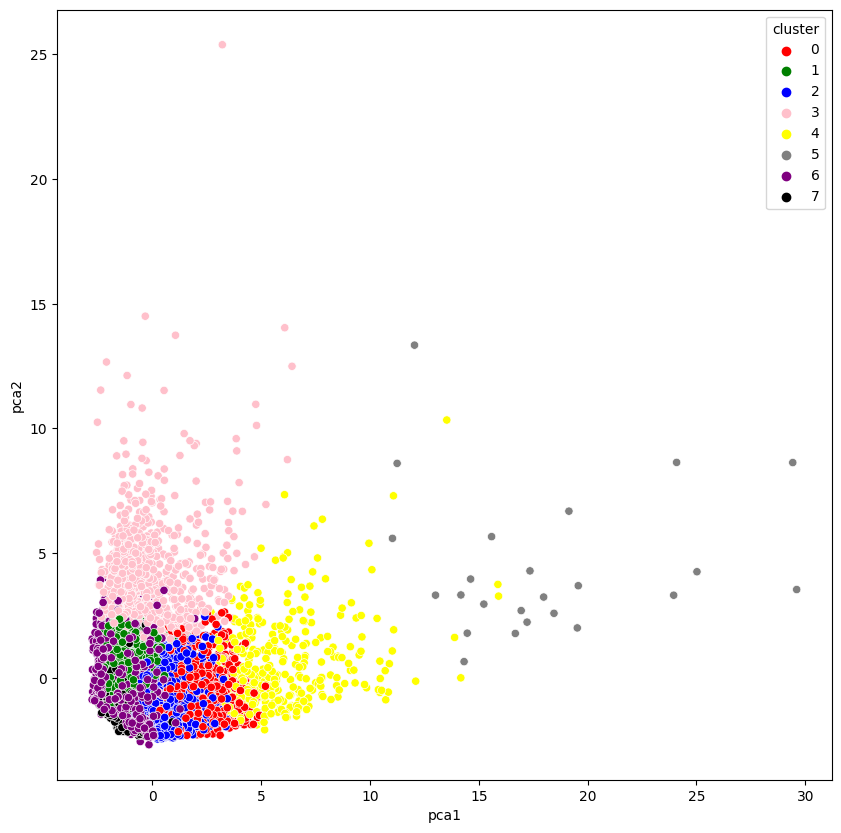

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x = "pca1", y = "pca2", hue = "cluster", data = pca_df,
                     palette = ["red", "green", "blue", "pink", "yellow", "gray", "purple", "black"])
plt.show()



